## IMPORTS

In [15]:
import pandas as pd
import sys
from matplotlib import pyplot as plt


sys.path.append('../../')
from utils import clustering_utils, bokeh_ui_utils

In [16]:
full_filtered_df = pd.read_csv('../../new_raw_data/rna_seq_processed/kallisto.csv')
# full_filtered_df = full_filtered_df.rename(columns={'Unnamed: 0': 'TTHERM_ID'})
# full_filtered_norm_df = microarray_utils.normalize_expression_per_gene(full_filtered_df)

num_genes = full_filtered_df.shape[0]
num_genes

21524

In [17]:
full_filtered_df.sample(10)

,TTHERM_ID,000min,030min,060min,090min,120min,150min,180min,210min,240min
15074,YF00023493.t1,0.111945,0.156085,0.275024,0.484691,0.718068,1.000000,0.450906,0.171246,0.000000
2699,YF00003987.t1,0.785867,1.000000,0.717778,0.619981,0.000000,0.539186,0.125072,0.315001,0.447508
15160,YF00023609.t1,0.178617,0.070701,0.000000,0.076450,0.192063,0.225163,0.701284,0.984098,1.000000
2803,YF00004171.t1,0.735266,1.000000,0.872539,0.452808,0.384117,0.416566,0.000000,0.320387,0.368534
19345,YF00032153.t1,0.891790,0.741564,0.000000,0.433047,0.621881,1.000000,0.825543,0.448169,0.262923
8584,YF00013421.t1,1.000000,0.019609,0.000000,0.146068,0.344413,0.448808,0.615195,0.450745,0.290991
40,YF00000056.t1,0.125827,0.000000,0.268561,0.461410,0.813662,1.000000,0.767599,0.356150,0.153979
19117,YF00031248.t1,0.101182,0.922672,1.000000,0.993951,0.148743,0.762707,0.000000,0.683256,0.544003
2033,YF00002748.t1,0.985075,0.437766,0.779803,0.638970,0.000000,1.000000,0.859820,0.500281,0.224295
3651,YF00005414.t1,0.327621,0.337920,0.610672,0.741984,0.833090,1.000000,0.340743,0.107033,0.000000


In [18]:
cycle_expression_conflict_df = full_filtered_df.loc[
    (full_filtered_df['000min'] > 0.9)
    &
    (full_filtered_df['210min'] < 0.1)
    &
    (full_filtered_df['240min'] < 0.1)
]

In [19]:
cycle_expression_conflict_df

,TTHERM_ID,000min,030min,060min,090min,120min,150min,180min,210min,240min
24,YF00000037.t1,1.0,0.853794,0.353349,0.240808,0.223147,0.453608,0.052389,0.000000,0.062464
29,YF00000042.t1,1.0,0.554570,0.521060,0.607660,0.670361,0.924888,0.367858,0.040823,0.000000
39,YF00000055.t1,1.0,0.780745,0.826095,0.677994,0.730632,0.804309,0.292918,0.054954,0.000000
53,YF00000069.t1,1.0,0.554737,0.285618,0.122721,0.042096,0.253012,0.046195,0.000000,0.082384
60,YF00000077.t1,1.0,0.493535,0.252497,0.243926,0.242430,0.487360,0.269457,0.087669,0.000000
...,...,...,...,...,...,...,...,...,...,...
21489,YF00038282.t1,1.0,0.007389,0.040364,0.163571,0.092265,0.119939,0.076044,0.005321,0.000000
21494,YF00038289.t1,1.0,0.176599,0.306503,0.030512,0.235837,0.164901,0.029555,0.000000,0.076388
21503,YF00038319.t1,1.0,0.588812,0.030537,0.132781,0.145157,0.373829,0.099703,0.000000,0.075590
21507,YF00038342.t1,1.0,0.613393,0.650296,0.964128,0.805318,0.615479,0.285367,0.000000,0.067575


In [20]:
cycle_expression_conflict_df.to_csv('./cycle_expression_conflict.csv')

### LEIDEN CLUSTERING

In [21]:
phases = 'rna_seq'

In [22]:
leiden_label_df_round_1, partition_stats, cluster_sizes, enriched_cluster_sizes =  clustering_utils.build_label_df(
    full_filtered_df, 
    metric='cosine', 
    n_neighbors=3, 
    resolution_param=0.030, 
    partition_type = 'EXP', 
    n_jobs = -1, 
    random_state=42
    )

In [23]:
leiden_label_df_round_1_arranged = bokeh_ui_utils.arrange_modules(full_filtered_df, leiden_label_df_round_1, phases) 
leiden_label_df_round_1_arranged_sorted = leiden_label_df_round_1_arranged.sort_values(by=['label', 'TTHERM_ID'], ascending=False)
leiden_label_df_round_1_arranged_sorted.to_csv('./test_nn3_leiden_label_df_round_1.csv', index=False)

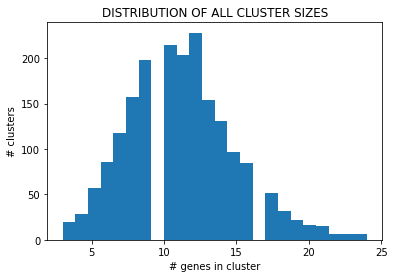

In [24]:
plt.hist(cluster_sizes, max(cluster_sizes))
plt.title('DISTRIBUTION OF ALL CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

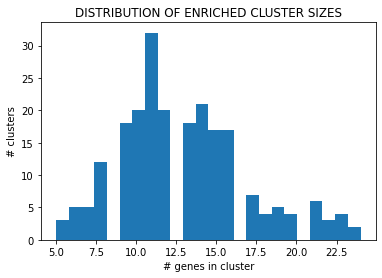

In [25]:
plt.hist(enriched_cluster_sizes, max(enriched_cluster_sizes))
plt.title('DISTRIBUTION OF ENRICHED CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

In [26]:
key_lens = [len(k) for k in partition_stats.keys()]
max_key_len = max(key_lens)

for k, v in partition_stats.items():
    print(f'{" " * (max_key_len - len(k))}{k}:', v)

              partition_type: EXP
              dimensionality: baseline
                      metric: cosine
                       graph: umap_fuzzy_simplicial_set
                         nns: 3
                  clustering: leiden_cpm
                   parameter: 0.03
            silhouette_score: -0.05087479908028571
                  modularity: 0.7558697249293244
                   nclusters: 1931
           mean_cluster_size: 11.146556188503366
         median_cluster_size: 11.0
             sd_cluster_size: 3.7439766643098498
          nenriched_clusters: 223
  mean_enriched_cluster_size: 12.928251121076233
median_enriched_cluster_size: 12.0
    sd_enriched_cluster_size: 4.03507715094374
     nenriched_cluster_genes: 2883
                    datetime: 2024-04-03 15:07:01.386746
